In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Path='/home/mgander/Atlantic/data/Viability/PRISM'

In [ ]:
# Downlaoded from https://depmap.org/portal/download/all/?release=PRISM+Repurposing+19Q4&file=secondary-screen-dose-response-curve-parameters.csv

# PRISM1

These are the primary single-dose experiments from which the "working" drugs have been selected for the 8-dose treatment in the secondary screens

In [3]:
## Cell line dictionary

df0=pd.read_csv(f'{Path}/downloaded_data/Primary/primary-screen-cell-line-info.csv')
achs=list(df0['row_name'])
ccls=list(df0['ccle_name'].astype('str'))
ccls=[a.split('_')[0] for a in ccls]

D_CCL={achs[i]:ccls[i] for i in range(len(achs))}
D_CCL['ACH-000561']='T.T'

# These didn't pass quality check
achs_remove=[a for a in achs if len(a.split('_'))>1]

In [4]:
## Drug dictionary
df2=pd.read_csv(f'{Path}/downloaded_data/Primary/primary-screen-replicate-treatment-info.csv')
ids=list(df2['column_name'])
drugs=list(df2['name'])
doses=list(df2['dose'])

D_drug={ids[i]:drugs[i] for i in range(len(ids))}
D_dose={ids[i]:doses[i] for i in range(len(ids))}

In [5]:
M=pd.read_csv(f'{Path}/downloaded_data/Primary/primary-screen-logfold-change.csv')

# Add cell line naming
M=M[~M['Unnamed: 0'].isin(achs_remove)].copy()
M_ccls=list(M['Unnamed: 0'])
M.index=[D_CCL[a] for a in M_ccls]
del M['Unnamed: 0']
# Let's flatten this
frames=[]
for i in range(len(M)):
    dfs=M.iloc[i:i+1].T.copy()
    dfs['Drug']=dfs.index
    dfs['CCL']=list(dfs.columns)[0]
    dfs.columns=['FC', 'Drug', 'CCL']
    dfs.index=range(len(dfs))
    frames.append(dfs)
M=pd.concat(frames, ignore_index=True)
M['Compound']=[D_drug[a] for a in M['Drug']]
M['Dose']=[D_dose[a] for a in M['Drug']]
M['Source']='PRISM1'

In [6]:
M0=M.copy()

# PRISM2

The 8-dose viability experiments

In [7]:
## Cell line dictionary

df0=pd.read_csv(f'{Path}/downloaded_data/Secondary/secondary-screen-cell-line-info.csv')
achs=list(df0['row_name'])
ccls=list(df0['ccle_name'].astype('str'))
ccls=[a.split('_')[0] for a in ccls]

D_CCL={achs[i]:ccls[i] for i in range(len(achs))}
D_CCL['ACH-000561']='T.T'

# These didn't pass quality check
achs_remove=[a for a in achs if len(a.split('_'))>1]
achs_remove.append('ACH-000010_FAILED_STR')
achs_remove.append('ACH-000028_FAILED_STR')
achs_remove.append('ACH-000807_FAILED_STR')
achs_remove.append('ACH-000511_FAILED_STR')
achs_remove.append('ACH-001078_FAILED_STR')
achs_remove.append('ACH-000539_FAILED_STR')
achs_remove.append('ACH-000409_FAILED_STR')
achs_remove.append('ACH-000925_FAILED_STR')

In [8]:
## Drug dictionary
df2=pd.read_csv(f'{Path}/downloaded_data/Secondary/secondary-screen-replicate-treatment-info.csv')
ids=list(df2['column_name'])
drugs=list(df2['name'])
doses=list(df2['dose'])

D_drug={ids[i]:drugs[i] for i in range(len(ids))}
D_dose={ids[i]:doses[i] for i in range(len(ids))}

In [9]:
M=pd.read_csv(f'{Path}/downloaded_data/Secondary/secondary-screen-logfold-change.csv')

# Add cell line naming
M=M[~M['Unnamed: 0'].isin(achs_remove)].copy()
M_ccls=list(M['Unnamed: 0'])
M.index=[D_CCL[a] for a in M_ccls]
del M['Unnamed: 0']
# Let's flatten this
frames=[]
for i in range(len(M)):
    dfs=M.iloc[i:i+1].T.copy()
    dfs['Drug']=dfs.index
    dfs['CCL']=list(dfs.columns)[0]
    dfs.columns=['FC', 'Drug', 'CCL']
    dfs.index=range(len(dfs))
    frames.append(dfs)
M=pd.concat(frames, ignore_index=True)
M['Compound']=[D_drug[a] for a in M['Drug']]
M['Dose']=[D_dose[a] for a in M['Drug']]
M['Source']='PRISM2'

In [10]:
M1=M.copy()

In [11]:
len(set(M1['CCL']))

481

In [12]:
len(set(M1['Compound']))

1449

# Combine

In [13]:
frames=[M0, M1]
M=pd.concat(frames, ignore_index=True)

In [14]:
M['Viability']=2**M['FC']

In [15]:
M['Duration']=5*24

In [16]:
# Only keep relevant columns
M['Drug']=M['Compound']
M=M[['CCL', 'Drug', 'Dose', 'Duration', 'Viability', 'Source']].copy()

In [17]:
M=M[~np.isnan(M['Viability'])].copy()
M=M[M['Drug'].astype('str')!='nan']
M

,CCL,Drug,Dose,Duration,Viability,Source
0,NIHOVCAR3,EBPC,2.50000,120,0.927413,PRISM1
1,NIHOVCAR3,levomepromazine,2.50000,120,1.823268,PRISM1
2,NIHOVCAR3,8-hydroxy-DPAT,2.50000,120,1.105143,PRISM1
3,NIHOVCAR3,viloxazine,2.50000,120,1.121932,PRISM1
4,NIHOVCAR3,MR-16728,2.50000,120,0.936893,PRISM1
...,...,...,...,...,...,...
27201697,TT,bortezomib,20.00070,120,0.301302,PRISM2
27201698,TT,oltipraz,0.00977,120,0.789436,PRISM2
27201699,TT,AZ-628,10.00000,120,0.845885,PRISM2
27201700,TT,alvespimycin,0.15600,120,1.563180,PRISM2


In [36]:
M.to_pickle(f'{Path}/M.pkl')

# Inspect

In [11]:
M=pd.read_pickle(f'{Path}/M.pkl')

In [12]:
M=M[M['Source']=='PRISM2'].copy()
M['CCL']=list(M['CCL'])
M['Drug']=list(M['Drug'])

In [13]:
M['CCL']=M['CCL'].astype('category')
M['Drug']=M['Drug'].astype('category')
C=pd.crosstab(M['CCL'], M['Drug'])
C

Drug,1-azakenpaullone,1-naphthyl-PP1,1-phenylbiguanide,10-deacetylbaccatin,10-hydroxycamptothecin,12-O-tetradecanoylphorbol-13-acetate,2'-MeCCPA,"2,3-DCPE",2-methoxyestradiol,3'-fluorobenzylspiperone,...,warfarin,xanomeline,xilobam,xylazine,zaldaride,zaleplon,zardaverine,ziprasidone,zolantidine,zolmitriptan
CCL,,,,,,,,,,,,,,,,,,,,,
22RV1,24,24,8,8,24,13,24,24,16,24,...,16,24,24,24,24,24,14,22,0,24
2313287,24,24,24,24,16,13,24,24,48,16,...,8,24,24,24,24,24,24,15,8,16
253J,15,16,24,24,16,7,15,16,32,16,...,24,16,8,24,16,24,16,23,0,0
253JBV,23,8,24,24,23,13,7,24,40,24,...,8,16,24,24,24,24,16,23,8,16
42MGBA,23,24,24,16,22,13,24,15,47,24,...,24,15,24,16,16,24,19,14,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YD38,23,24,24,24,22,13,24,7,47,24,...,16,15,8,24,16,24,14,15,8,16
YD8,23,16,24,16,18,11,16,24,47,21,...,24,23,16,24,24,16,16,21,0,22
YH13,24,24,24,16,24,13,24,24,32,24,...,24,24,22,24,24,24,22,23,0,24


In [20]:
M[(M['CCL']=='YD38')&(M['Drug']=='ziprasidone')].sort_values('Dose')

,CCL,Drug,Dose,Duration,Viability,Source
20956137,YD38,ziprasidone,0.000610,120,1.308335,PRISM2
20956457,YD38,ziprasidone,0.000610,120,1.356152,PRISM2
20956447,YD38,ziprasidone,0.002441,120,2.283335,PRISM2
20956127,YD38,ziprasidone,0.002441,120,0.672058,PRISM2
20956136,YD38,ziprasidone,0.009766,120,0.582231,PRISM2
20956446,YD38,ziprasidone,0.039062,120,1.254399,PRISM2
20956126,YD38,ziprasidone,0.039062,120,1.082292,PRISM2
20956117,YD38,ziprasidone,0.156250,120,0.809507,PRISM2
20956437,YD38,ziprasidone,0.156250,120,1.483172,PRISM2
20956427,YD38,ziprasidone,0.625000,120,1.435573,PRISM2


<Axes: ylabel='Count'>

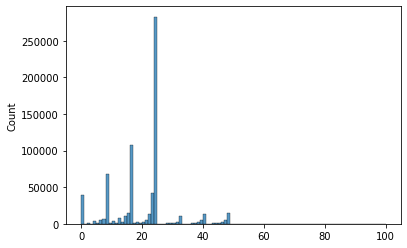

In [15]:
sns.histplot(C.values.flatten(), bins=np.linspace(0,100,101))

In [16]:
M

,CCL,Drug,Dose,Duration,Viability,Source
7998024,LS513,norethindrone,10.000000,120,2.245439,PRISM2
7998025,LS513,norethindrone,0.625000,120,2.017172,PRISM2
7998026,LS513,norethindrone,2.500000,120,1.286011,PRISM2
7998027,LS513,norethindrone,0.156250,120,1.283904,PRISM2
7998028,LS513,norethindrone,0.039062,120,1.209125,PRISM2
...,...,...,...,...,...,...
27201697,TT,bortezomib,20.000700,120,0.301302,PRISM2
27201698,TT,oltipraz,0.009770,120,0.789436,PRISM2
27201699,TT,AZ-628,10.000000,120,0.845885,PRISM2
27201700,TT,alvespimycin,0.156000,120,1.563180,PRISM2


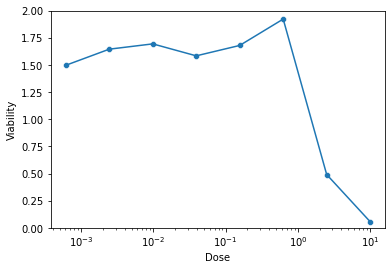

In [55]:
for i in range(100):
    cs=C.sample().T.sample(1)
    if cs.values>3:
        dr=list(cs.index)[0]
        ccl=list(cs.columns)[0]
        Ms=M[(M['CCL']==ccl)&(M['Drug']==dr)].copy()
        sns.lineplot(data=Ms, x='Dose', y='Viability')
        sns.scatterplot(data=Ms, x='Dose', y='Viability')
        break
plt.ylim(0,2)
plt.xscale('log')

In [ ]:
# They are quite bad